In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import pandas as pd
import numpy as np

In [2]:
def make_dash_table(df):
    table = []
    html_col_name= ['-']
    for col in df.columns:
        html_col_name.append(html.Td([col]))
    table.append(html.Tr(html_col_name))
    for index, row in df.iterrows():
        html_row = [index]
        for i in range(len(row)):
            html_row.append(html.Td([row[i]]))
        table.append(html.Tr(html_row))
    return table

In [3]:
def make_table_without_col(df):
    table= []
    for index, row in df.iterrows():
        html_row = [index]
        for i in range(len(row)):
            html_row.append(html.Td([row[i]]))
        table.append(html.Tr(html_row))
    return table

In [4]:
df_data_description=pd.read_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/variables-explication.csv')

credit_1 = pd.read_sas("/Users/xudawei/Desktop/Dash/Credit的副本/data/CREDIT.sas7bdat", 
                       format = 'sas7bdat', encoding = "ISO-8859-1")
data_1 = pd.DataFrame(credit_1)
# supprimer des varaibles répétées
data=data_1[['sit6m_4','LIB_PTR_NIV_1','NBR_ECH_TOT','TYP_CDT','MNT_ACH','MNT_OCT','COD_SIT_FAM',
    'NBR_EFT_CHG','TYP_CTR_TRV','cod_pcs2','cod_sit_log2','COD_SEX','age',
   'MNT_SAL','MNT_RTI','MNT_PSN_IVD']]
data.head(n=2)

,sit6m_4,LIB_PTR_NIV_1,NBR_ECH_TOT,TYP_CDT,MNT_ACH,MNT_OCT,COD_SIT_FAM,NBR_EFT_CHG,TYP_CTR_TRV,cod_pcs2,cod_sit_log2,COD_SEX,age,MNT_SAL,MNT_RTI,MNT_PSN_IVD
0,B,"Enseigne mode, beauté, maison",30.0,REN,0.0,1000.0,M,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0,0.0,0.0
1,I,"Enseigne mode, beauté, maison",33.0,REN,0.0,1000.0,C,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0,0.0,0.0


In [5]:
data['revenu'] = (data['MNT_SAL'] + data['MNT_RTI'] + data['MNT_PSN_IVD'])
df_original = data.drop(columns= ['MNT_SAL','MNT_RTI','MNT_PSN_IVD'])
df_original.head(n=2)

/Users/xudawei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,sit6m_4,LIB_PTR_NIV_1,NBR_ECH_TOT,TYP_CDT,MNT_ACH,MNT_OCT,COD_SIT_FAM,NBR_EFT_CHG,TYP_CTR_TRV,cod_pcs2,cod_sit_log2,COD_SEX,age,revenu
0,B,"Enseigne mode, beauté, maison",30.0,REN,0.0,1000.0,M,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0
1,I,"Enseigne mode, beauté, maison",33.0,REN,0.0,1000.0,C,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0


In [6]:
# changer le nom des columns
columns = ['Credit','Partenaire','Durée_du_crédit',
           'Type_de_produit','Montant_du_crédit','Montant_du_renouvelable',
          'Situation_familliale','Nombre_enfant','Contrat_de_travail',
           'Profession','Situation_logement','Sex','Age','Revenu']
df_original.columns = columns
df_original.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,B,"Enseigne mode, beauté, maison",30.0,REN,0.0,1000.0,M,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0
1,I,"Enseigne mode, beauté, maison",33.0,REN,0.0,1000.0,C,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0


In [7]:
df = df_original.copy()

In [8]:
# age, revenu, durée du credit : variables continues
credit_dict = {"B": 1, "I":1,"M":0}
def obj_credit(credit):
    changer = credit_dict
    return changer[credit]
df['Credit']=df['Credit'].apply(obj_credit)

In [9]:
df['Credit'].unique()

array([1, 0])

In [10]:
Partenaire_list = np.unique(df['Partenaire'].values).tolist()
Partenaire_dict, anti_Partenaire_dict = {},{}
for (item, index) in enumerate(Partenaire_list):
    Partenaire_dict[index] = item
    anti_Partenaire_dict[item] = index

anti_Partenaire_dict

{0: 'Enseigne AUTRES',
 1: 'Enseigne Bijouterie',
 2: 'Enseigne Electroménager',
 3: 'Enseigne Optique 1',
 4: 'Enseigne Optique 2',
 5: 'Enseigne Optique 3',
 6: 'Enseigne audition',
 7: 'Enseigne mode, beauté, maison',
 8: 'Enseigne réparation auto'}

In [11]:
#changer le tyep de 'Partenaire'
def obj2num_Partenaire(Partenaire):
    changer = Partenaire_dict
    return changer[Partenaire]
df['Partenaire']=df['Partenaire'].apply(obj2num_Partenaire)
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,REN,0.0,1000.0,M,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0
1,1,7,33.0,REN,0.0,1000.0,C,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0


In [12]:
Type_de_produit_list = np.unique(df['Type_de_produit'].values).tolist()
Type_de_produit_dict, anti_Type_de_produit_dict = {},{}
for (item, index) in enumerate(Type_de_produit_list):
    Type_de_produit_dict[index] = item
    anti_Type_de_produit_dict[item] = index

anti_Type_de_produit_dict

{0: 'AMO', 1: 'REN'}

In [13]:
#changer le tyep de 'Type_de_produit'
def obj2num_Type_de_produit(Type_de_produit):
    changer = Type_de_produit_dict
    return changer[Type_de_produit]
df['Type_de_produit']=df['Type_de_produit'].apply(obj2num_Type_de_produit)

In [14]:
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.0,1000.0,M,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0
1,1,7,33.0,1,0.0,1000.0,C,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0


In [15]:
Situation_familliale_list = np.unique(df['Situation_familliale'].values).tolist()
Situation_familliale_dict, anti_Situation_familliale_dict = {},{}
for (item, index) in enumerate(Situation_familliale_list):
    Situation_familliale_dict[index] = item
    anti_Situation_familliale_dict[item] = index

anti_Situation_familliale_dict

{0: 'C', 1: 'D', 2: 'K', 3: 'M', 4: 'P', 5: 'S', 6: 'V'}

In [16]:
#changer le tyep de 'Situation_familliale'
def obj2num_Situation_familliale(Situation_familliale):
    changer = Situation_familliale_dict
    return changer[Situation_familliale]
df['Situation_familliale']=df['Situation_familliale'].apply(obj2num_Situation_familliale)

In [17]:
df['Contrat_de_travail']=df['Contrat_de_travail'].fillna('NON')
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.0,1000.0,3,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0
1,1,7,33.0,1,0.0,1000.0,0,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0


In [18]:
Contrat_de_travail_list = np.unique(df['Contrat_de_travail'].values).tolist()
Contrat_de_travail_dict, anti_Contrat_de_travail_dict = {},{}
for (item, index) in enumerate(Contrat_de_travail_list):
    Contrat_de_travail_dict[index] = item
    anti_Contrat_de_travail_dict[item] = index

anti_Contrat_de_travail_dict

{0: 'AUT', 1: 'CDD', 2: 'CDI', 3: 'INT', 4: 'NON'}

In [19]:
#changer le tyep de 'Contrat_de_travail'
def obj2num_Contrat_de_travail(Contrat_de_travail):
    changer = Contrat_de_travail_dict
    return changer[Contrat_de_travail]
df['Contrat_de_travail']=df['Contrat_de_travail'].apply(obj2num_Contrat_de_travail)

In [20]:
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.0,1000.0,3,1.0,2,Employés,Accession à la propriété,F,39.0,1400.0
1,1,7,33.0,1,0.0,1000.0,0,2.0,0,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0


In [21]:
Profession_list = np.unique(df['Profession'].values).tolist()
Profession_dict, anti_Profession_dict = {},{}
for (item, index) in enumerate(Profession_list):
    Profession_dict[index] = item
    anti_Profession_dict[item] = index

anti_Profession_dict

{0: 'Agriculteurs exploitants',
 1: "Artisans, commerçants et chefs d'entreprise",
 2: 'Cadres et professions intellectuelles supérieures',
 3: 'Employés',
 4: 'Invalidités',
 5: 'Ouvriers',
 6: 'Professions intermédiaires',
 7: 'Retraités',
 8: 'Sans activité professionnelle'}

In [22]:
#changer le tyep de 'Profession'
def obj2num_Profession(Profession):
    changer = Profession_dict
    return changer[Profession]
df['Profession']=df['Profession'].apply(obj2num_Profession)

In [23]:
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.0,1000.0,3,1.0,2,3,Accession à la propriété,F,39.0,1400.0
1,1,7,33.0,1,0.0,1000.0,0,2.0,0,1,Accession à la propriété,F,52.0,2000.0


In [24]:
Situation_logement_list = np.unique(df['Situation_logement'].values).tolist()
Situation_logement_dict, anti_Situation_logement_dict = {},{}
for (item, index) in enumerate(Situation_logement_list):
    Situation_logement_dict[index] = item
    anti_Situation_logement_dict[item] = index

anti_Situation_logement_dict

{0: 'Accession à la propriété',
 1: 'Locataire',
 2: 'Logement de fonction',
 3: 'Logé par famille',
 4: 'Propriétaire'}

In [25]:
#changer le tyep de 'Situation_logement'
def obj2num_Situation_logement(Situation_logement):
    changer = Situation_logement_dict
    return changer[Situation_logement]
df['Situation_logement']=df['Situation_logement'].apply(obj2num_Situation_logement)

In [26]:
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.0,1000.0,3,1.0,2,3,0,F,39.0,1400.0
1,1,7,33.0,1,0.0,1000.0,0,2.0,0,1,0,F,52.0,2000.0


In [27]:
Sex_list = np.unique(df['Sex'].values).tolist()
Sex_dict, anti_Sex_dict = {},{}
for (item, index) in enumerate(Sex_list):
    Sex_dict[index] = item
    anti_Sex_dict[item] = index

anti_Sex_dict

{0: 'F', 1: 'M'}

In [28]:
#changer le tyep de 'Sex'
def obj2num_Sex(Sex):
    changer = Sex_dict
    return changer[Sex]
df['Sex']=df['Sex'].apply(obj2num_Sex)

In [29]:
df.head()


,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.00,1000.00,3,1.0,2,3,0,0,39.0,1400.0
1,1,7,33.0,1,0.00,1000.00,0,2.0,0,1,0,0,52.0,2000.0
2,1,8,30.0,1,0.00,1000.00,0,0.0,2,3,3,1,21.0,750.0
3,1,8,4.0,1,122.58,3000.00,6,0.0,4,7,4,0,83.0,1600.0
4,1,2,15.0,0,499.99,499.99,0,0.0,2,5,1,1,41.0,1400.0


In [30]:
# traitement des valeurs aberrents des variables quantitatives
# 
df['Durée_du_crédit'].plot(kind ='box',grid = True)

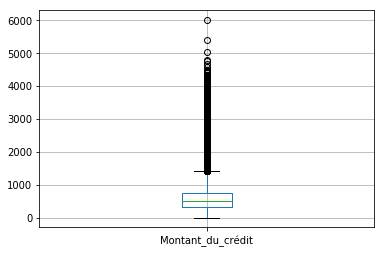

In [31]:
df['Montant_du_crédit'].plot.box(grid = True)

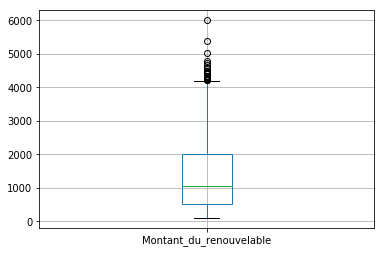

In [32]:
df['Montant_du_renouvelable'].plot.box(grid = True)

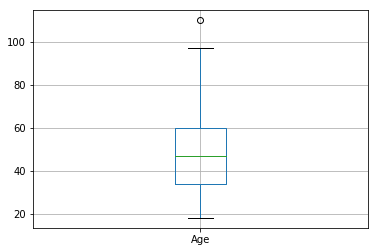

In [33]:
df['Age'].plot.box(grid = True)

In [34]:
df = df[df["Age"] < 100]
df['Age'].unique()

array([39., 52., 21., 83., 41., 33., 26., 55., 60., 51., 22., 50., 20.,
       53., 45., 67., 30., 59., 54., 48., 62., 29., 69., 58., 27., 70.,
       63., 71., 37., 23., 42., 44., 25., 68., 56., 19., 24., 61., 57.,
       32., 34., 49., 36., 43., 64., 46., 72., 65., 31., 28., 81., 47.,
       38., 35., 40., 75., 82., 79., 91., 78., 73., 66., 89., 77., 80.,
       18., 74., 76., 88., 84., 87., 86., 85., 90., 92., 94., 97., 95.,
       93., 96.])

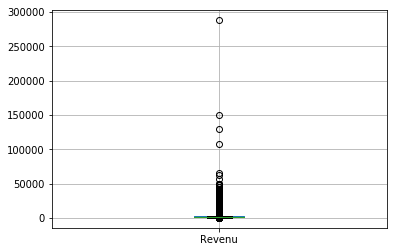

In [35]:
df['Revenu'].plot.box(grid = True)

In [36]:
df = df[df["Revenu"] < 100000]

df.shape

(64785, 14)

In [37]:
df_c = df_original.copy()
df_c['Count']= 1
df_c.head()

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu,Count
0,B,"Enseigne mode, beauté, maison",30.0,REN,0.00,1000.00,M,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0,1
1,I,"Enseigne mode, beauté, maison",33.0,REN,0.00,1000.00,C,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0,1
2,I,Enseigne réparation auto,30.0,REN,0.00,1000.00,C,0.0,CDI,Employés,Logé par famille,M,21.0,750.0,1
3,B,Enseigne réparation auto,4.0,REN,122.58,3000.00,V,0.0,NaN,Retraités,Propriétaire,F,83.0,1600.0,1
4,B,Enseigne Electroménager,15.0,AMO,499.99,499.99,C,0.0,CDI,Ouvriers,Locataire,M,41.0,1400.0,1


In [38]:
#correlation entre des variables
corr = df.corr(method = 'pearson').round(3) 
corr

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
Credit,1.000,0.039,-0.056,0.027,-0.049,0.009,0.086,0.024,0.042,0.027,0.015,-0.025,0.086,0.016
Partenaire,0.039,1.000,-0.338,0.458,-0.207,0.374,-0.068,-0.006,-0.073,-0.007,-0.100,0.112,-0.083,-0.009
Durée_du_crédit,-0.056,-0.338,1.000,-0.312,0.361,-0.204,-0.007,0.022,0.029,0.019,0.009,0.001,0.008,-0.012
Type_de_produit,0.027,0.458,-0.312,1.000,-0.354,0.759,-0.056,0.004,-0.053,-0.035,-0.072,0.044,-0.084,-0.026
Montant_du_crédit,-0.049,-0.207,0.361,-0.354,1.000,0.200,0.108,-0.078,0.199,0.119,0.156,0.038,0.233,0.089
Montant_du_renouvelable,0.009,0.374,-0.204,0.759,0.200,1.000,0.016,-0.033,0.060,0.035,0.007,0.063,0.048,0.020
Situation_familliale,0.086,-0.068,-0.007,-0.056,0.108,0.016,1.000,0.144,0.302,0.201,0.154,-0.008,0.416,0.073
Nombre_enfant,0.024,-0.006,0.022,0.004,-0.078,-0.033,0.144,1.000,-0.334,-0.240,-0.308,-0.003,-0.272,0.024
Contrat_de_travail,0.042,-0.073,0.029,-0.053,0.199,0.060,0.302,-0.334,1.000,0.674,0.404,0.004,0.720,0.028
Profession,0.027,-0.007,0.019,-0.035,0.119,0.035,0.201,-0.240,0.674,1.000,0.271,0.025,0.486,-0.041


In [39]:
# Data des individus qui ont mauvais credits 
df_M = df.groupby('Credit').get_group(0).drop(columns = ['Credit'])
df_M.head()


,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
79,3,10.0,0,2000.0,2000.0,0,0.0,2,3,1,0,34.0,1800.0
91,3,10.0,0,2000.0,2000.0,0,0.0,4,7,1,0,65.0,1700.0
97,3,10.0,0,2000.0,2000.0,0,1.0,2,3,1,0,31.0,1650.0
110,3,10.0,0,1478.0,1478.0,0,0.0,2,1,0,1,20.0,2000.0
112,3,10.0,0,1213.9,1213.9,0,0.0,2,1,1,1,45.0,2000.0


In [40]:
# correlation : des individus qui ont mauvais credits 
corr_M = df_M.corr('pearson').round(3)
corr_M

,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
Partenaire,1.000,-0.460,0.308,-0.463,0.090,0.167,0.128,-0.020,0.028,-0.032,0.015,0.018,-0.042
Durée_du_crédit,-0.460,1.000,-0.214,0.529,0.021,-0.134,-0.075,0.121,0.094,0.020,0.014,0.009,0.007
Type_de_produit,0.308,-0.214,1.000,-0.335,0.678,0.091,0.050,0.022,0.031,-0.006,-0.092,0.034,-0.032
Montant_du_crédit,-0.463,0.529,-0.335,1.000,0.260,-0.248,-0.178,0.045,0.030,0.038,0.101,-0.051,0.080
Montant_du_renouvelable,0.090,0.021,0.678,0.260,1.000,-0.022,-0.023,0.065,0.071,-0.006,-0.006,0.018,-0.007
Situation_familliale,0.167,-0.134,0.091,-0.248,-0.022,1.000,0.369,0.157,0.088,-0.119,-0.066,0.349,0.065
Nombre_enfant,0.128,-0.075,0.050,-0.178,-0.023,0.369,1.000,-0.097,-0.042,-0.218,-0.194,0.053,-0.031
Contrat_de_travail,-0.020,0.121,0.022,0.045,0.065,0.157,-0.097,1.000,0.372,0.033,0.020,0.485,-0.045
Profession,0.028,0.094,0.031,0.030,0.071,0.088,-0.042,0.372,1.000,-0.013,0.006,0.154,-0.126
Situation_logement,-0.032,0.020,-0.006,0.038,-0.006,-0.119,-0.218,0.033,-0.013,1.000,0.093,-0.032,0.090


In [41]:
app = dash.Dash()
server = app.server

In [42]:
#page header
logo = html.Div([
        html.Div([
            html.Img(src = 'http://a1.qpic.cn/psc?/V10phP0q0oyczr/bqQfVz5yrrGYSXMvKr.cqdQlDnDwTwkrUzmbITN50NxMI0oww5jV7E5W2h5PytymK0sdQysh5NUzGNj7rP7qe8e.dEMgB743CPtQuzghT3c!/b&ek=1&kp=1&pt=0&bo=4ALmAwAAAAABFzc!&tl=3&vuin=610542792&tm=1605196800&sce=60-2-2&rf=viewer_4&t=5', height='200',width = '200')  
            ], className = 'ten columns padded')
    ], className = 'row gs-header')

header = html.Div([
        html.Div([
            html.H5(
            "Rapport d'analyse des données sur l'état du crédit client")
        ], className = 'twelve columns padded')
    ], className = 'row gs-header gs-text-header' )


In [43]:
# row1
row1 = html.Div([
    html.Div([
        html.H6('Contexte',
               className = "gs-header gs-text-header padded"),
        html.Br([]),
        dcc.Markdown("""Les données proviennent de l'enseignant 
        universitaire Ferome. Foncel, l'objectif de l’analyse est 
        de construire un modèle permettant de prédire le risque de 
        défaut de remboursement des clients auprès d’un organisme de 
        crédit (et de son partenaire commercial en lien avec le projet 
        d’achat du client) au moment de l’étude de leur demande 
        de prêt. Si ce risque est trop élevé, l’organisme de crédit 
        refusera d'accorder un prêt au client. Il s’agit donc de 
        proposer une méthode pour calculer un « score » correspondant 
        à la probabilité individuelle de défaut.""")], className = 'twelve columns')
], className = 'row')


In [44]:
# row2
row2 = html.Div([
    html.Div([
        html.H6(["Explication des variables"],
               className = "gs-header gs-table-header padded"),
        html.Table(make_dash_table(df_data_description))
    ], className = 'two columns'),
    html.Div([
        html.H6(["Description du Data"],
               className = "gs-header gs-table-header padded"),
        html.Table(make_dash_table(df.describe(include = "all").round(2).fillna("")))
    ], className = 'two columns'),
], className = 'row')


In [45]:
df.head()

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.00,1000.00,3,1.0,2,3,0,0,39.0,1400.0
1,1,7,33.0,1,0.00,1000.00,0,2.0,0,1,0,0,52.0,2000.0
2,1,8,30.0,1,0.00,1000.00,0,0.0,2,3,3,1,21.0,750.0
3,1,8,4.0,1,122.58,3000.00,6,0.0,4,7,4,0,83.0,1600.0
4,1,2,15.0,0,499.99,499.99,0,0.0,2,5,1,1,41.0,1400.0


In [46]:
# row3
pie_list = ['Credit','Partenaire', 'Durée_du_crédit', 'Type_de_produit', 'Montant_du_crédit', 'Montant_du_renouvelable', 'Situation_familliale', 'Nombre_enfant',
           'Contrat_de_travail','Profession','Situation_logement','Sex','Age','Revenu']
type_list = ['Valeur', 'Proportion']
row3 = html.Div([
    html.Div([
        html.H6(["La proportion de chaque variable"],
                className="gs-header gs-table-header padded"),
        html.Div([
            dcc.Dropdown(
            id='pie_dropdown',
            options=[{'label':i, 'value':i} for i in pie_list],
            value=pie_list[3])
        ],style={'width': '25%','margin-left': '0%'}),
    dcc.Graph(id='pie')
    ], className="two columns"),
    
    ##柱状图
    html.Div([
        html.H6(["Répartition des variables"],
                className="gs-header gs-table-header padded"),
        html.Div([
            dcc.Dropdown(
                id='type_dropdown',
                options=[{'label': i, 'value': i} for i in type_list],
                value=type_list[0])
        ], style={'width': '15%', 'margin-left': '0%','display': 'inline-block'}),
        html.Div([
            dcc.Dropdown(
                id='bar_dropdown',
                options=[{'label': i, 'value': i} for i in df.columns],
                value=df.columns[3])
        ], style={'width': '20%', 'margin-left': '0%','display': 'inline-block'}),
        dcc.Graph(id='bar')
    ], className="two columns"),
], className="row ")


In [47]:
# row4
row4 = html.Div([
    html.Div([
        html.H6(["Carte thermique de la valeur de corrélation globale"],
                className="gs-header gs-table-header padded"),
        dcc.Graph(id='heatmap',
                  figure={
                      'data':[
                          go.Heatmap(z=np.fabs(corr.values),
                              x = corr.columns.tolist(),
                              y = corr.index.tolist(),
                              colorscale='YlGnBu')],
                      'layout':go.Layout(margin=dict(l=100, b=100, t=50))
                  })
    ], className="five columns"),
    html.Div([
        html.H6(["Corrélation Pearson des variables des tous les clients"],
                className="gs-header gs-table-header padded"),
        html.Table(make_dash_table(corr)),
        html.H6(["Analyse des données de tous les clients"],
                className="gs-header gs-table-header padded"),
        html.Br([]),
        dcc.Markdown('''     
1. La proportion de clients avec un mauvais crédit est de 1,13%(733 individus), une petite proportion de l'ensemble :Skewed Class

2. Il y a des clients avec un mauvais crédit dans chaque type de partenaire

3. Les clients avec une durée de crédit de 1 an(92.86%), dans un délai d'un an(89.42%), 6 ans(22.22%), 25 ans(100%), 
   30 ans(34.49%), 33 ans(56.48%) et 34 ans(85.25%) ont le pourcentage le plus élevé de clients avec un mauvais crédit.

4. Il y a plus de clients avec un mauvais crédit pour les produits renouvelables(3319 individus), et pour les produits amortissables(1983 individus).

5. Il y a moins de clients avec un mauvais crédit, lorsqu’ils sont propriétaire (6.27%)

6. Les clients de moins de 30 ans avec un crédit médiocre représentent une proportion plus élevée.
        '''),
    ], className="two columns"),
], className="row ")


In [48]:
df_cluster = pd.read_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/K-means-DBSCAN')
df_cluster['Count'] =1
df_cluster['km_labels'].unique()


array(['2_catégorie', '1_catégorie', '3_catégorie', 'Autres'],
      dtype=object)

In [49]:
# row5
scatter3d_list0 = ['Credit','Partenaire', 'Durée_du_crédit', 'Type_de_produit', 'Montant_du_crédit', 'Montant_du_renouvelable', 'Situation_familliale', 'Nombre_enfant',
           'Contrat_de_travail','Profession','Situation_logement','Sex','Age','Revenu']

scatter3d_list1 =['Partenaire', 'Durée_du_crédit', 'Type_de_produit', 'Montant_du_crédit', 'Montant_du_renouvelable', 'Situation_familliale', 'Nombre_enfant',
           'Contrat_de_travail','Profession','Situation_logement','Sex','Age','Revenu']

employee_class = ['Tous_lesc_lients', 
                  '2_catégorie', 
                  '1_catégorie', 
                  '3_catégorie', 
                  'Autres']

cluster_list = ['K-means', 'DBSCAN']
p = pd.crosstab(df_cluster["Count"], df_cluster["km_labels"], margins=False)
q = pd.crosstab(df_cluster["Count"], df_cluster["db_labels"], margins=False)
cluster_table = p.append(q)
cluster_table.index=cluster_list
row5 = html.Div([
    html.Div([
        html.H6(["Corrélation Pearson des variables pour les clients avec un mauvais crédit"],
                className="gs-header gs-table-header padded"),
        html.Table(make_dash_table(corr_M)),
        html.H6(["Carte thermique de la valeur de corrélation pour les clients avec un mauvais crédit"],
                className="gs-header gs-table-header padded"),
        dcc.Graph(id='heatmap_l',
                  figure={
                      'data':[
                          go.Heatmap(z=np.fabs(corr_M.values),
                              x = corr_M.columns.tolist(),
                              y = corr_M.index.tolist(),
                              colorscale='YlGnBu')],
                      'layout':go.Layout(margin=dict(l=100, b=90, t=40))
                  })
        ], className="five columns"),
    html.Div([
        html.H6(["Regroupement de clients avec un mauvais crédit"],
                className="gs-header gs-table-header padded"),
        html.Table(make_dash_table(cluster_table)),
        html.H6(["Nuage de points 3D en cluster de clients avec un mauvais crédit"],
                className="gs-header gs-table-header padded"),
        html.Div([
            dcc.Dropdown(
            id='cluster_dropdown',
            options=[{'label':i, 'value':i} for i in cluster_list],
            value=cluster_list[0]),
        ],style={'width': '20%','margin-left': '0%','display': 'inline-block'}),
        dcc.Graph(id='cluster'),
        dcc.Markdown('''
+ Utilisez les algorithmes de clustering DBSCAN et K-means pour effectuer un traitement de clustering sur les cinq variables de 'Durée_du_crédit', 'Montant_du_crédit', 'Montant_du_renouvelable', 'Âge' et 'Revenu' des clients ayant un faible crédit dans ce projet.
+ Pour ce projet, K-means a une capacité de distinction plus forte que DBSCAN
+ Dans la figure ci-dessus, x_axis est Durée_du_crédit, y_axis est Montant_du_crédit et z_axis est Revenu
1. la moyen de 10 CVs Score ,  std de 10 CVs Score: 

  {'KNeighborsClassifier': [0.55, 0.02],
  'LogisticRegression': [0.81, 0.03],
  'AdaBoostClassifier': [0.82, 0.01],
  'GradientBoostingClassifier': [0.85, 0.02],
  'RandomForestClassifier': [0.65, 0.03]}
  
  Normalized: 

 {'KNeighborsClassifier': ['1.00', '1.00'],
 'LogisticRegression': ['1.46', '1.30'],
 'AdaBoostClassifier': ['1.49', '0.60'],
 'GradientBoostingClassifier': ['1.53', '0.99'],
 'RandomForestClassifier': ['1.17', '1.39']}

 Par conséquent, On peut savoir que LogisticRegression, AdaBoostClassifier et GradientBoostingClassifier dont out-of-the-bag sont les meilleurs

2. 1) AdaBoostClassifier

  ({'n_estimators': 200, 'learning_rate': 0.05}, Scoring-ROC_AUC: 0.843)

  Le meilleur point de la courbe ROC: TPR = 74.92%, FPR = 26.27%

  Meilleur point de coupure: 0.61

  F1 score: 0.389

  2) GradientBoostingClassifier

  ({'learning_rate': 0.1,'loss': 'exponential','max_depth': 3,'n_estimators': 200},
 
  Scoring-ROC_AUC:0.848)
  
  Le meilleur point de la courbe ROC: TPR = 78.74%, FPR = 20.76%
  
  Meilleur point de coupure: 0.99

  F1 score :  0.329

3. LogisticRegression

  Scoring-ROC_AUC: 0.842

  Le meilleur point de la courbe ROC: TPR = 73.557%,FPR = 28.390%

  Meilleur point de coupure: 0.990

  F1 score : 0.410

  Par conséquent, on choisit le modèle logistique pour la prévision (F 1 score est le plus fort 0.4097 et Skewed class)         
        
        ''')
    ], className="seven columns"),
], className="row ")
    


In [50]:
row6 = html.Div([
    html.Div([
        html.H6(["Analyse des données clients avec un mauvais crédit"],
                className="gs-header gs-table-header padded"),
        html.Br([]),
        dcc.Markdown('''     
+ Selon la corrélation Pearson des données sur les clients de mauvais crédit, on peut voir que la durée de crédit, les partenaires, les types de produits et le montant total du crédit sont fortement corrélés et ont peu de relations avec d'autres variables telles que l'âge, le sexe, la profession, etc.


+ La première phrase peut être comprise comme suit: votre sexe, âge, profession et type de contrat de travail n'ont rien à voir avec le montant total de votre crédit et la durée de crédit.
+ Selon le graphique cluster 3D, on peut voir que les clients avec un mauvais crédit présentent des phénomènes de clustering, qui peuvent être divisés en 3 catégories：
    1_catégorie: 
    
    Durées du credit: 10 -15 ans, montant du credit: 500-1000 euros, revenus: 1000 euros environs, Les clients ayant un mauvais crédit sont plus regroupés

    2_catégorie: 
    
    Durées du credit: 10 -15 ans et 20 ans, montant du credit: 1000-2000 euros, revenus: 1500 euros environs, Les clients ayant un mauvais crédit sont plus regroupés, mais à mesure que les revenus augmentent, le regroupement s’affaiblira un peu

    3_catégorie: 
    
    Durées du credit: 5 ans et 15 ans, montant du credit: 500 euros environs, revenus: 1200 euros environs, Les clients ayant un mauvais crédit sont plus regroupés.

+ Selon les clusters, il y a 320 personnes dans la première catégorie, 255 personnes dans la deuxième catégorie et 157 personnes dans la troisième catégorie. La première catégorie a la proportion la plus élevée

+ Le premier type de clients avec un mauvais crédit, du point de vue de la durée de crédit, de le montant de crédit, du revenu et le nombre de clients, le risque est plus grand

+ Le deuxième type de clients pauvres en crédit est similaire au premier type de clients pauvres en crédit, mais le nombre de clients est considérablement réduit et le niveau de risque est moyen

+ Le troisième type de clients pauvres en crédit a une courte durée de prêt, un petit montant du credit, un bon revenu, un petit nombre de personnes et le niveau de risque est faible.
                '''),

    ], className="seven columns"),
    html.Div([
        html.H6(["Conclusion et Stratégie"],
                className="gs-header gs-table-header padded"),
        html.Br([]),
        dcc.Markdown('''
+ Conlusion：Comparaison de 5 modèles dont la régression logistique est la plus performante；Pour les clients en cluster avec un mauvais crédit, k-means est plus fort que DBSCAN
  
   
+ Stratégie：Troisième type de clients de crédit pauvres, leur risque est faible, directement notés comme mauvais crédit, ce qui peut entraîner des pertes de clients. Les banques devraient mieux analyser les conditions des clients et assurer une coopération à long terme avec les clients.
                '''),
    ], className="five columns"),
], className="row ")


In [51]:
df_c.head()

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu,Count
0,B,"Enseigne mode, beauté, maison",30.0,REN,0.00,1000.00,M,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0,1
1,I,"Enseigne mode, beauté, maison",33.0,REN,0.00,1000.00,C,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0,1
2,I,Enseigne réparation auto,30.0,REN,0.00,1000.00,C,0.0,CDI,Employés,Logé par famille,M,21.0,750.0,1
3,B,Enseigne réparation auto,4.0,REN,122.58,3000.00,V,0.0,NaN,Retraités,Propriétaire,F,83.0,1600.0,1
4,B,Enseigne Electroménager,15.0,AMO,499.99,499.99,C,0.0,CDI,Ouvriers,Locataire,M,41.0,1400.0,1


In [52]:
# app layout
app.layout = html.Div([
    logo,
    header,
    html.Br([]),
    row1,
    row2,
    row3,
    row4,
    row5,
    row6

], className="subpage")

In [53]:
@app.callback(
dash.dependencies.Output('pie', 'figure'),
[dash.dependencies.Input('pie_dropdown', 'value')])
def update_pie(value):
    count = df_c.groupby(value).count()
    trace = go.Pie(labels=count['Count'].index.tolist(), values=count['Count'].tolist())
    layout = go.Layout(margin=dict(t=0, b=0), height=400)
    return dict(data=[trace], layout=layout)

In [54]:
@app.callback(
dash.dependencies.Output('bar', 'figure'),
[dash.dependencies.Input('bar_dropdown', 'value'),
 dash.dependencies.Input('pie_dropdown', 'value'),
 dash.dependencies.Input('type_dropdown', 'value')])
def update_bar(value0, value1, type):
    cross = pd.crosstab(df_c[value0], df_c[value1], margins=True)
    cross_col_name = cross.columns.tolist()[:-1]
    cross_ = cross.copy()
    for name in cross_col_name:
        cross_[name] = cross_[name] / cross_['All']
    if type == 'Valeur':
        cross_new = cross.iloc[:-1, :-1]
    else:
        cross_new = cross_.iloc[:-1, :-1]
    data = []
    for key in cross_new.columns.tolist():
        trace = go.Bar(
            x=cross_new.index.tolist(),
            y=cross_new[key].tolist(),
            name=key,
            opacity=0.6
        )
        data.append(trace)
    layout = go.Layout(barmode='stack', margin=dict(t=0, b=30),height=400)
    fig = go.Figure(data=data, layout=layout)
    return fig

In [55]:
# Row5
@app.callback(
    dash.dependencies.Output('cluster','figure'),
    [dash.dependencies.Input('cluster_dropdown','value')]
)
# x轴， y 轴都为连续性变量quantite， z轴，散点大小为离散型变量qualitative
def graph_cluster(value):
    changer = {'K-means':'km_labels','DBSCAN':'db_labels'}
    group_cluster = df_cluster.groupby(changer[value])
    data=[]
    for item in employee_class[1:]:
        dff = group_cluster.get_group(item)
        trace = go.Scatter3d(
            x=dff['Durée_du_crédit'],
            y=dff['Montant_du_crédit'],
            z=dff['Revenu'],
            name=item,
            mode='markers',
            marker=dict(
                size=4,
            ))
        data.append(trace)
    layout = go.Layout(margin=dict(l=20, r=20, t=0, b=30), height=450)
    fig = go.Figure(data=data, layout=layout)
    return fig

In [56]:
df_cluster.head(n=2)

,Unnamed: 0,Unnamed: 0.1,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu,km_labels,db_labels,Count
0,79,79,Enseigne Optique 1,10.0,AMO,2000.0,2000.0,C,0.0,CDI,Employés,Locataire,F,34.0,1800.0,2_catégorie,1_catégorie,1
1,91,91,Enseigne Optique 1,10.0,AMO,2000.0,2000.0,C,0.0,NaN,Retraités,Locataire,F,65.0,1700.0,2_catégorie,1_catégorie,1


In [57]:
# change host from the default to '0.0.0.0' to make it publicly available
#host='127.0.0.1'  https://dash-da-hr.herokuapp.com/

In [58]:
external_css = ["https://cdnjs.cloudflare.com/ajax/libs/normalize/7.0.0/normalize.min.css",
                "https://cdnjs.cloudflare.com/ajax/libs/skeleton/2.0.4/skeleton.min.css",
                "//fonts.googleapis.com/css?family=Raleway:400,300,600",
                "http://raw.githack.com/ffzs/DA_dash_hr/master/css/my.css",
                "https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"]


In [59]:
for css in external_css:
    app.css.append_css({"external_url": css})

external_js = ["https://code.jquery.com/jquery-3.2.1.min.js",
               "https://codepen.io/bcd/pen/YaXojL.js"]

for js in external_js:
    app.scripts.append_script({"external_url": js})

if __name__ == '__main__':
    app.run_server(host='0.0.0.0', debug=False,port=8020)
   

Dash is running on http://0.0.0.0:8020/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:8020/ (Press CTRL+C to quit)
/Users/xudawei/anaconda3/lib/python3.7/site-packages/dash/resources.py:68: UserWarning: You have set your config to `serve_locally=True` but A local version of https://code.jquery.com/jquery-3.2.1.min.js is not available.
If you added this file with `app.scripts.append_script` or `app.css.append_css`, use `external_scripts` or `external_stylesheets` instead.
See https://dash.plot.com/external-resources
  ).format(s["external_url"])
/Users/xudawei/anaconda3/lib/python3.7/site-packages/dash/resources.py:68: UserWarning: You have set your config to `serve_locally=True` but A local version of https://codepen.io/bcd/pen/YaXojL.js is not available.
If you added this file with `app.scripts.append_script` or `app.css.append_css`, use `external_scripts` or `external_stylesheets` instead.
See https://dash.plot.com/external-resources
  ).format(s["external_url"])
/Users/xudawei/anaconda3/lib/python3.7/site-packages/dash/resources.py:68: Us